<a href="https://colab.research.google.com/github/ddovidovich/DataScienceLerning/blob/main/UNIT_04_DZ_ultra_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо создать, обучить нейронную сеть с точностью не менее 50% и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания классов в cifar100
* сохраните веса
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


Названия классов cifar100:

In [1]:
# определяем названия классов по порядку, установленному в описании набора данных
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
           'bed', 'bee', 'beetle', 'bicycle', 'bottle',
           'bowl', 'boy', 'bridge', 'bus', 'butterfly',
           'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
           'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
           'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
           'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
           'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum',
           'rabbit', 'raccoon', 'ray', 'road', 'rocket',
           'rose', 'sea', 'seal', 'shark', 'shrew',
           'skunk', 'skyscraper', 'snail', 'snake', 'spider',
           'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
           'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulip', 'turtle', 'wardrobe',
           'whale', 'willow_tree', 'wolf', 'tawomannk', 'worm']

In [2]:
from tensorflow.keras.datasets import cifar100

# Загрузка cifar100
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [3]:
print(x_train100.shape)
print(x_test100.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


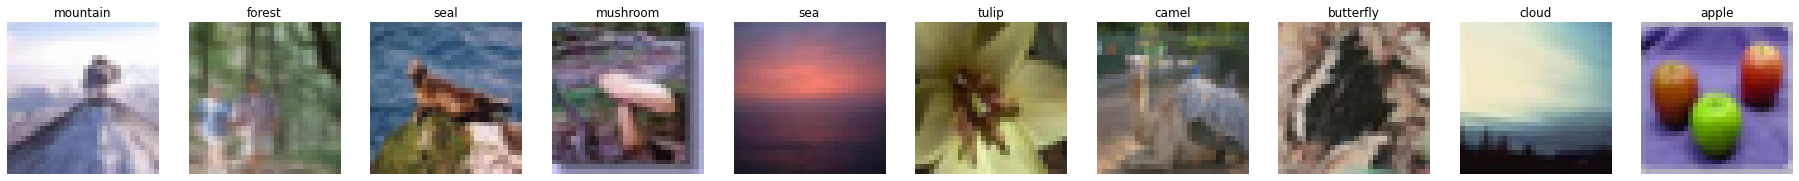

In [9]:
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 
from PIL import Image 

f, ax = plt.subplots(1, 10, figsize=(32, 4))
for i in range(10):
      img = x_test100[i]
      ax[i].imshow(img)
      ax[i].axis('off')
      ax[i].set_title(classes[int(y_test100[i])])
plt.show()

In [10]:
# Нормирование изображений

x_train100 = x_train100 / 255.
x_test100 = x_test100 / 255.

In [11]:
# Перевод меток класса y_train и y_test в формат one hot encoding

from tensorflow.keras import utils

# Число категорий в to_categorical() можно не указывать - инструмент определит его по данным
y_train100 = utils.to_categorical(y_train100)
y_test100 = utils.to_categorical(y_test100)

In [12]:
# Проверка формы получившихся выборок

print(x_train100.shape)
print(x_test100.shape)
print(y_train100.shape)
print(y_test100.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


In [13]:
batch_size = 128 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [15]:
model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                        

Epoch 1/100
391/391 [==============================] - 90s 196ms/step - loss: 4.0834 - accuracy: 0.1118 - val_loss: 5.4669 - val_accuracy: 0.0240
Epoch 2/100
391/391 [==============================] - 73s 188ms/step - loss: 3.3115 - accuracy: 0.2142 - val_loss: 3.1529 - val_accuracy: 0.2422
Epoch 3/100
391/391 [==============================] - 76s 194ms/step - loss: 2.8288 - accuracy: 0.2983 - val_loss: 2.5487 - val_accuracy: 0.3542
Epoch 4/100
391/391 [==============================] - 75s 193ms/step - loss: 2.4403 - accuracy: 0.3716 - val_loss: 2.3069 - val_accuracy: 0.4076
Epoch 5/100
391/391 [==============================] - 76s 194ms/step - loss: 2.1359 - accuracy: 0.4356 - val_loss: 2.1436 - val_accuracy: 0.4359
Epoch 6/100
391/391 [==============================] - 76s 194ms/step - loss: 1.8879 - accuracy: 0.4924 - val_loss: 2.0046 - val_accuracy: 0.4750
Epoch 7/100
391/391 [==============================] - 76s 194ms/step - loss: 1.6678 - accuracy: 0.5429 - val_loss: 1.8987 -

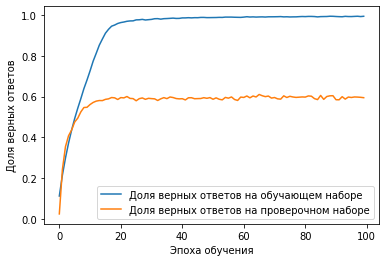

In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(x_train100, 
                    y_train100, 
                    batch_size=batch_size, 
                    epochs=100,
                    validation_data=(x_test100, y_test100),
                    verbose=1)

# Вывод графика точности обучения

import matplotlib.pyplot as plt # -------- отрисовка графиков

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [18]:
# Сохранение обученной модели полностью (веса и архитектура) после всех эпох

model.save('model_fmr_all.h5')

In [19]:
# сохранение весов модели

model.save_weights('model_fmr_weights.h5') 

In [36]:
# Загрузка тестовых изображений 7 классов

import gdown

url = 'https://wc8lkg.db.files.1drv.com/y4mDShx888xQSp8SO8aNWIjfwRIiuJL581GJUb_stkoBK8UZs_Jtuwz09ptSsMhWdND0HL9P1Xfa2Vi0dTms6v7T3ndcu8nkN6rIIDV5JkiOaLwUdfajW8F9W27GhxwkDO0HovjYIcG2mEW1uCRCJBiQ3Id75yWVMyVfMRV0fDjpQTKljsOyAgob1Z_jjqZ1iqy'
output = 'test_imgs.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://wc8lkg.db.files.1drv.com/y4mDShx888xQSp8SO8aNWIjfwRIiuJL581GJUb_stkoBK8UZs_Jtuwz09ptSsMhWdND0HL9P1Xfa2Vi0dTms6v7T3ndcu8nkN6rIIDV5JkiOaLwUdfajW8F9W27GhxwkDO0HovjYIcG2mEW1uCRCJBiQ3Id75yWVMyVfMRV0fDjpQTKljsOyAgob1Z_jjqZ1iqy
To: /content/test_imgs.zip
100%|██████████| 34.2k/34.2k [00:00<00:00, 43.6MB/s]


'test_imgs.zip'

In [37]:
# Распаковка архива

!unzip test_imgs.zip

Archive:  test_imgs.zip
  inflating: img_0.jpg               
  inflating: img_1.jpg               
  inflating: img_2.jpg               
  inflating: img_3.jpg               
  inflating: img_4.jpg               
  inflating: img_5.jpg               
  inflating: img_6.jpg               


In [38]:
# Требуемый для модели размер изображения
img_width, img_height = 32, 32

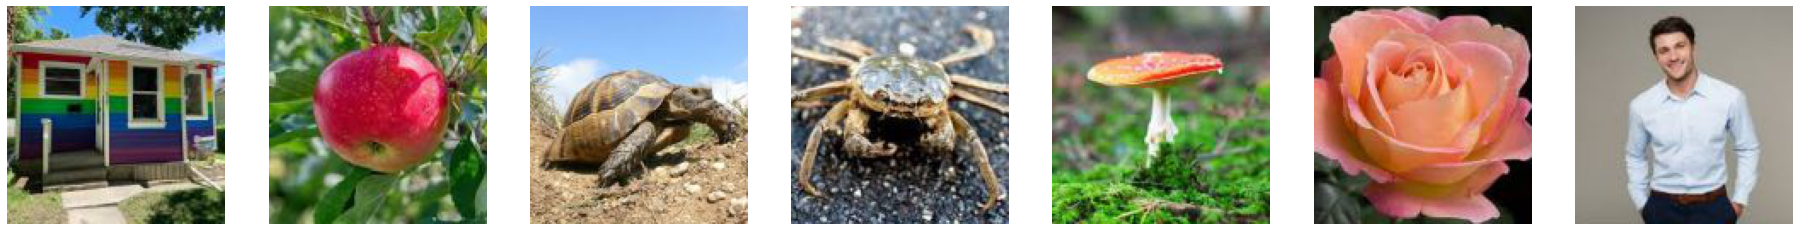

In [41]:
# Просмотр тестовых изображений

f, ax = plt.subplots(1, 7, figsize=(32, 4))
for i in range(7):
      img = Image.open('/content/img_%s.jpg'%(i))
      ax[i].imshow(img)
      ax[i].axis('off')
plt.show()                                 

In [47]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

def predict(img_path='./img_6.jpg', model_path='./model_fmr_all.h5'):
    classes = {0: 'яблоко', 
               1: 'аквариумная рыбка', 
               2: 'ребенок', 
               3: 'медведь', 
               4: 'бобер',
               5: 'кровать', 
               6: 'пчела', 
               7: 'жук', 
               8: 'велосипед', 
               9: 'бутылка',
               10: 'чаша', 
               11: 'мальчик', 
               12: 'мост', 
               13: 'автобус', 
               14: 'бабочка',
               15: 'верблюд', 
               16: 'банка', 
               17: 'замок', 
               18: 'гусеница', 
               19: 'крупный рогатый скот',
               20: 'стул', 
               21: 'шимпанзе', 
               22: 'часы', 
               23: 'облако', 
               24: 'таракан',
               25: 'диван', 
               26: 'краб', 
               27: 'крокодил', 
               28: 'чашка', 
               29: 'динозавр',
               30: 'дельфин', 
               31: 'слон', 
               32: 'камбала', 
               33: 'лес', 
               34: 'лиса',
               35: 'девочка', 
               36: 'хомяк', 
               37: 'дом', 
               38: 'кенгуру', 
               39: 'клавиатура',
               40: 'лампа', 
               41: 'газонокосилка', 
               42: 'леопард', 
               43: 'лев', 
               44: 'ящерица',
               45: 'лобстер', 
               46: 'человек', 
               47: 'клен', 
               48: 'мотоцикл', 
               49: 'гора',
               50: 'мышь', 
               51: 'гриб', 
               52: 'дуб', 
               53: 'апельсин', 
               54: 'орхидея',
               55: 'выдра', 
               56: 'пальма', 
               57: 'груша', 
               58: 'пикап', 
               59: 'ель',
               60: 'равнина', 
               61: 'тарелка', 
               62: 'мак', 
               63: 'дикобраз', 
               64: 'опоссум',
               65: 'кролик', 
               66: 'енот', 
               67: 'скат', 
               68: 'дорога', 
               69: 'ракета',
               70: 'роза', 
               71: 'море', 
               72: 'тюлень', 
               73: 'акула', 
               74: 'землеройка',
               75: 'скунс', 
               76: 'небоскреб', 
               77: 'улитка', 
               78: 'змея', 
               79: 'паук',
               80: 'белка', 
               81: 'трамвай', 
               82: 'подсолнух', 
               83: 'сладкий перец', 
               84: 'стол',
               85: 'танк', 
               86: 'телефон', 
               87: 'телевизор', 
               88: 'тигр', 
               89: 'трактор',
               90: 'поезд', 
               91: 'форель', 
               92: 'тюльпан', 
               93: 'черепаха', 
               94: 'шкаф',
               95: 'кит', 
               96: 'ива', 
               97: 'волк', 
               98: 'женщина', 
               99: 'червь'}               
    
    model = load_model(model_path)

    img_width, img_height = 32, 32

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img, dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))
    
    print(classes[cls_image])

In [45]:
predict()

1/1 [==============================] - 0s 178ms/step
человек


In [48]:
# Сохранение кода скрипта в переменной text_code

text_code = '''
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict(img_path='./img_6.jpg', model_path='./model_fmr_all.h5'):
    classes = {0: 'яблоко', 
               1: 'аквариумная рыбка', 
               2: 'ребенок', 
               3: 'медведь', 
               4: 'бобер',
               5: 'кровать', 
               6: 'пчела', 
               7: 'жук', 
               8: 'велосипед', 
               9: 'бутылка',
               10: 'чаша', 
               11: 'мальчик', 
               12: 'мост', 
               13: 'автобус', 
               14: 'бабочка',
               15: 'верблюд', 
               16: 'банка', 
               17: 'замок', 
               18: 'гусеница', 
               19: 'крупный рогатый скот',
               20: 'стул', 
               21: 'шимпанзе', 
               22: 'часы', 
               23: 'облако', 
               24: 'таракан',
               25: 'диван', 
               26: 'краб', 
               27: 'крокодил', 
               28: 'чашка', 
               29: 'динозавр',
               30: 'дельфин', 
               31: 'слон', 
               32: 'камбала', 
               33: 'лес', 
               34: 'лиса',
               35: 'девочка', 
               36: 'хомяк', 
               37: 'дом', 
               38: 'кенгуру', 
               39: 'клавиатура',
               40: 'лампа', 
               41: 'газонокосилка', 
               42: 'леопард', 
               43: 'лев', 
               44: 'ящерица',
               45: 'лобстер', 
               46: 'человек', 
               47: 'клен', 
               48: 'мотоцикл', 
               49: 'гора',
               50: 'мышь', 
               51: 'гриб', 
               52: 'дуб', 
               53: 'апельсин', 
               54: 'орхидея',
               55: 'выдра', 
               56: 'пальма', 
               57: 'груша', 
               58: 'пикап', 
               59: 'ель',
               60: 'равнина', 
               61: 'тарелка', 
               62: 'мак', 
               63: 'дикобраз', 
               64: 'опоссум',
               65: 'кролик', 
               66: 'енот', 
               67: 'скат', 
               68: 'дорога', 
               69: 'ракета',
               70: 'роза', 
               71: 'море', 
               72: 'тюлень', 
               73: 'акула', 
               74: 'землеройка',
               75: 'скунс', 
               76: 'небоскреб', 
               77: 'улитка', 
               78: 'змея', 
               79: 'паук',
               80: 'белка', 
               81: 'трамвай', 
               82: 'подсолнух', 
               83: 'сладкий перец', 
               84: 'стол',
               85: 'танк', 
               86: 'телефон', 
               87: 'телевизор', 
               88: 'тигр', 
               89: 'трактор',
               90: 'поезд', 
               91: 'форель', 
               92: 'тюльпан', 
               93: 'черепаха', 
               94: 'шкаф',
               95: 'кит', 
               96: 'ива', 
               97: 'волк', 
               98: 'женщина', 
               99: 'червь'}
    
    model = load_model(model_path)

    img_width, img_height = 32, 32

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img, dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))
    
    print(classes[cls_image])
    
'''

# Запись содержимого переменной в файл скрипта

with open('script.py', 'w') as f:  # Создание / открытие файла 
    f.write(text_code)             # Запись в файл значения переменной text_code

In [49]:
label_txt = '''

яблоко 
аквариумная рыбка 
ребенок 
медведь 
бобер
кровать 
пчела 
жук 
велосипед 
бутылка
чаша 
мальчик 
мост 
автобус 
бабочка
верблюд 
банка 
замок 
гусеница 
крупный рогатый скот
стул 
шимпанзе 
часы 
облако 
таракан
диван 
краб 
крокодил 
чашка 
динозавр
дельфин 
слон 
камбала 
лес 
лиса
девочка 
хомяк 
дом 
кенгуру 
клавиатура
лампа 
газонокосилка 
леопард 
лев 
ящерица
лобстер 
человек 
клен 
мотоцикл 
гора
мышь 
гриб 
дуб 
апельсин 
орхидея
выдра 
пальма 
груша 
пикап 
ель
равнина 
тарелка 
мак 
дикобраз 
опоссум
кролик 
енот 
скат 
дорога 
ракета
роза 
море 
тюлень 
акула 
землеройка
скунс 
небоскреб 
улитка 
змея 
паук
белка 
трамвай 
подсолнух 
сладкий перец 
стол
танк 
телефон 
телевизор 
тигр 
трактор
поезд 
форель 
тюльпан 
черепаха 
шкаф
кит 
ива 
волк 
женщина 
червь
'''

with open('label.txt', 'w') as f:  # Создание / открытие файла 
    f.write(label_txt.strip())     # Запись в файл значения переменной

In [50]:
import os
from zipfile import ZipFile as Zip             # Модуль для работы с zip-архивами

# Список всех файлов
integrate_files = ['model_fmr_all.h5', 'script.py', 'label.txt', *[f'img_{i}.jpg' for i in range(1, 7)]]

zipArchive = Zip('/content/archive.zip', 'w')  # Открытие файла, если такого не существует - будет создан новый

for file in integrate_files:                   # Для всех всем нужных файлов:
    if os.path.exists(file):                   # Если файл существует,
        zipArchive.write(file)                 # то добавление его в архив
    else:
        print(f'Файл {file} отсутствует!')     # иначе вывод на экран названия отсутствующего файла

zipArchive.close()                             # В финале архив следует закрыть, как и обычный файл

In [51]:
from google.colab import files               # Функция для скачивания данных на локальный компьютер

files.download(filename='archive.zip')       # Скачивание готового архива

print('Архив загружен')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Архив загружен
